<a id="toc"></a>

# Data Science task:
# drink Menu


- [1. Import dataset](#1)
- [2. Data preparation](#2)
    - [2.1 Remove duplicates](#2.1)
    - [2.2 Fill null values](#2.2)
    - [2.3 Drop unnecessary Columns](#2.3)
- [3. Data Visualisations](#3)
    - [3.1 Which drink has the highest calories from the dataset?](#3.1)
    - [3.2 Highest Sugar Drink?](#3.2)
- [4. extra visualization](#4)
    - [4.1 Correlation between Different Variables](#4.1)
    - [4.2 count plot](#4.2)

# import libraries
Here we will import all libraries that we are going to use in the notebook


In [1]:
import pandas as pd 
import numpy as np 
import re 

import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline  


<a id=1></a>
## 1. Import dataset

In [2]:
df = pd.read_csv('drinkMenu.csv')
print(df.shape)
df.head()


(242, 18)


,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


# [^^^ index ^^^](#toc)

## 2. Data preparation
<a id=2.1></a>

<a id=2.1></a>
### 2.1 Remove duplicates

In [3]:
df.drop_duplicates(inplace=True)
df.shape

(242, 18)

<a id=2.2></a>
### 2.2 Fill null values

* First we need to know how many null values are in the data.
* Second convert the numerical values into int or float values.
* Third check the columns which have null and which is the best way to fill these nulls.
* Lastly apply the method we will use for filling nulls.


In [4]:
# here we print the data information which show every thing about the columns data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [5]:
#unique values before 
df['Caffeine (mg)'].value_counts().head()
# due to the wide range of data. It has a min of 0 and a max of 410. 
#  we can fill nan with the median to be more accurate

75        37
0         35
150       34
70        14
varies    12
Name: Caffeine (mg), dtype: int64

In [6]:
# because np.NaN is of type float we are going to convert all data into float. 
def findDigits(text:str)-> float: 
    """
    input: 
        text: string  
    outputs: 
        string that holds all the numerical data in the column 
        
    this function returns numeric values of data in string format
    """
    clean_text = re.sub(r"[^0-9]+", "", str(text))
    if clean_text == '': 
        clean_text = np.NaN
    return  float(clean_text)

In [7]:
# second convert the numerical values into int or float values.
# then we need to see the columns describtion
df['Caffeine (mg)'] = df['Caffeine (mg)'].map(lambda a: findDigits(a))
## here we remove the string values ^ 
# then we are going to convert them into float then replace nan with median value
df['Caffeine (mg)'] = df['Caffeine (mg)'].replace(np.NaN, df['Caffeine (mg)'].median())
df['Vitamin A (% DV) '] = df['Vitamin A (% DV) '].str.replace('%', '').astype(float)  # force type str
df['Vitamin C (% DV)'] = df['Vitamin C (% DV)'].str.replace('%', '').astype(float)
df[' Calcium (% DV) '] = df[' Calcium (% DV) '].str.replace('%', '').astype(float)
df['Iron (% DV) '] = df['Iron (% DV) '].str.replace('%', '').astype(float)

In [8]:
# unique values after 

df['Caffeine (mg)'].unique()

array([175., 260., 330., 410.,  75., 150.,  85.,  95., 180., 225., 300.,
        10.,  20.,  25.,  30.,   0.,  50.,  70., 120.,  55.,  80., 110.,
       165., 235.,  90., 125., 170.,  15., 130., 140., 100., 145.,  65.,
       105.])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    float64

<a id=2.3></a>
### 2.3 Drop unnecessary Columns

In [10]:
dfcleaned = df.copy()
dfcleaned
dfcleaned.drop(['Beverage_prep','Trans Fat (g) ', 'Saturated Fat (g)',
                 ' Sodium (mg)',' Total Carbohydrates (g) ', ' Dietary Fibre (g)',
                 ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
                 ' Calcium (% DV) ', 'Caffeine (mg)'], axis=1, inplace=True)
# examing the changes
dfcleaned.head()

,Beverage_category,Beverage,Calories,Total Fat (g),Cholesterol (mg),Sugars (g),Iron (% DV)
0,Coffee,Brewed Coffee,3,0.1,0,0,0.0
1,Coffee,Brewed Coffee,4,0.1,0,0,0.0
2,Coffee,Brewed Coffee,5,0.1,0,0,0.0
3,Coffee,Brewed Coffee,5,0.1,0,0,0.0
4,Classic Espresso Drinks,Caffè Latte,70,0.1,10,9,0.0


# [index ^^^](#toc)


<a id=3></a>
## 3. Data Visualisations

<a id=3.1></a>

### 3.1 Which drink has the highest calories from the dataset?

In [11]:
# the highest calories drink from the dataset is "Signature Espresso Drinks " and the top 5 categories 
# are shown below
classic = dfcleaned.sort_values(by='Calories', ascending=False)
classic.head()

,Beverage_category,Beverage,Calories,Total Fat (g),Cholesterol (mg),Sugars (g),Iron (% DV)
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),510,15,77,74,2.0
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),460,10,90,84,35.0
85,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),460,13,70,64,20.0
83,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),450,7,78,74,2.0
128,Tazo® Tea Drinks,Tazo® Green Tea Latte,450,10,72,71,6.0


<a id=3.2></a>
### 3.2 Highest Sugar Drink?

In [12]:
classic = dfcleaned.sort_values(by=' Sugars (g)', ascending=False)[['Beverage_category', ' Sugars (g)']]
classic.head()

,Beverage_category,Sugars (g)
214,Frappuccino® Blended Coffee,84
215,Frappuccino® Blended Coffee,84
101,Signature Espresso Drinks,83
216,Frappuccino® Blended Coffee,80
206,Frappuccino® Blended Coffee,77


# [^^^ up ^^^](#toc)


<a id =4></a>
## extra visualization 

<a id=4.1></a>
###  Mapping of the Correlation between Different Variables

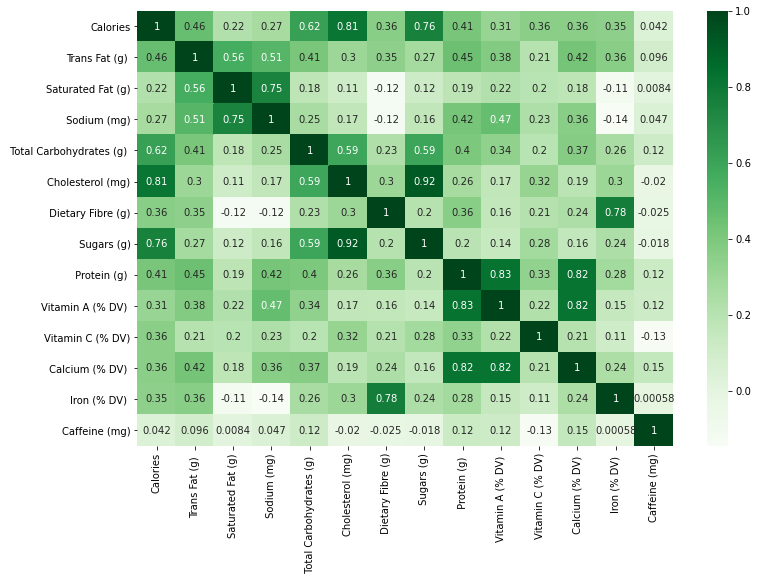

In [13]:
#Get correlation between different variables 
corr = df.corr(method='kendall')
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="Greens");


<a id=4.2></a>
### count plot that shows the most used items in drinks preparation

<AxesSubplot:xlabel='count', ylabel='Beverage_prep'>

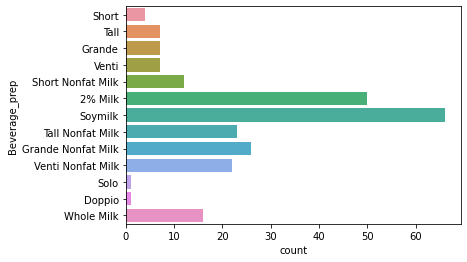

In [14]:
sns.countplot(y="Beverage_prep", data=df)
